In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler


In [39]:

df = pd.read_csv(r"C:\Users\USER\Downloads\sample_house_prices.csv")
df.head()


,Area,Bedrooms,Bathrooms,Stories,Mainroad,Price
0,1200,2,1,1,yes,200000
1,1500,3,2,2,yes,250000
2,1800,3,2,2,no,275000
3,2400,4,3,2,yes,350000
4,3000,4,3,3,no,400000


In [41]:
# Check for nulls
print(df.isnull().sum())

# Convert categorical to numerical
df = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df.drop("Price", axis=1)
y = df["Price"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Area         0
Bedrooms     0
Bathrooms    0
Stories      0
Mainroad     0
Price        0
dtype: int64


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [59]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)


In [61]:
from sklearn.model_selection import train_test_split

# OLD
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# ✅ NEW: Increase test size so test set has at least 2 samples
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [55]:
print("Test set size:", len(y_test))


Test set size: 2


In [63]:
print("y_test:", y_test.values)
print("Predicted (Linear):", y_pred_lr)
print("Predicted (Ridge):", y_pred_ridge)
print("Predicted (Lasso):", y_pred_lasso)


y_test: [250000 400000]
Predicted (Linear): [276694.45938677 371180.74233459]
Predicted (Ridge): [276121.78488439 363977.12805263]
Predicted (Lasso): [237500.10543008 424999.67689011]


In [65]:
def evaluate_model(name, y_test, y_pred):
    print(f"{name} Results:")
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))
    print("-" * 30)

evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Ridge Regression", y_test, y_pred_ridge)
evaluate_model("Lasso Regression", y_test, y_pred_lasso)


Linear Regression Results:
RMSE: 27777.182851552276
MAE: 27756.858526089316
R2 Score: 0.8628316645033653
------------------------------
Ridge Regression Results:
RMSE: 31464.225311318343
MAE: 31072.328415879485
R2 Score: 0.8240004489881945
------------------------------
Lasso Regression Results:
RMSE: 19763.99768352812
MAE: 18749.78573001409
R2 Score: 0.9305572258783102
------------------------------


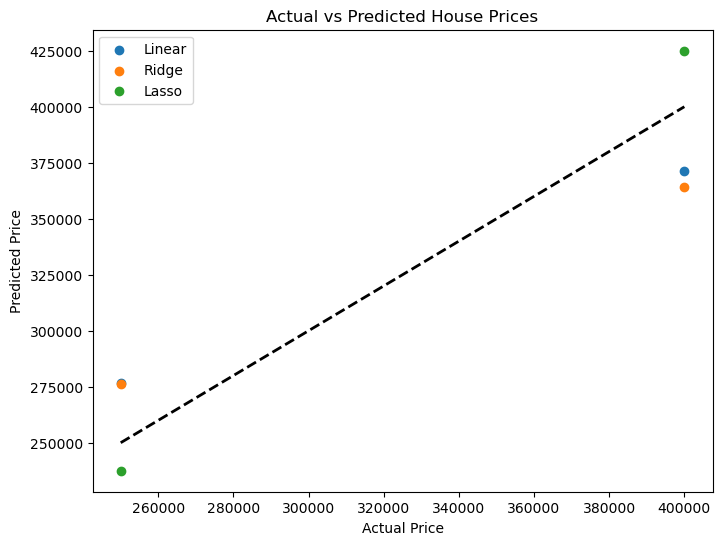

In [67]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lr, label="Linear")
plt.scatter(y_test, y_pred_ridge, label="Ridge")
plt.scatter(y_test, y_pred_lasso, label="Lasso")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()


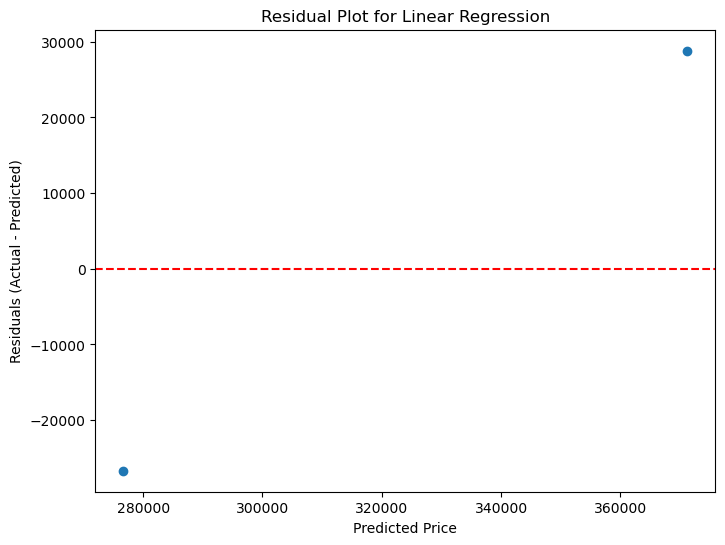

In [69]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred_lr  # change y_pred_lr to other model predictions if needed

plt.figure(figsize=(8,6))
plt.scatter(y_pred_lr, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot for Linear Regression")
plt.show()


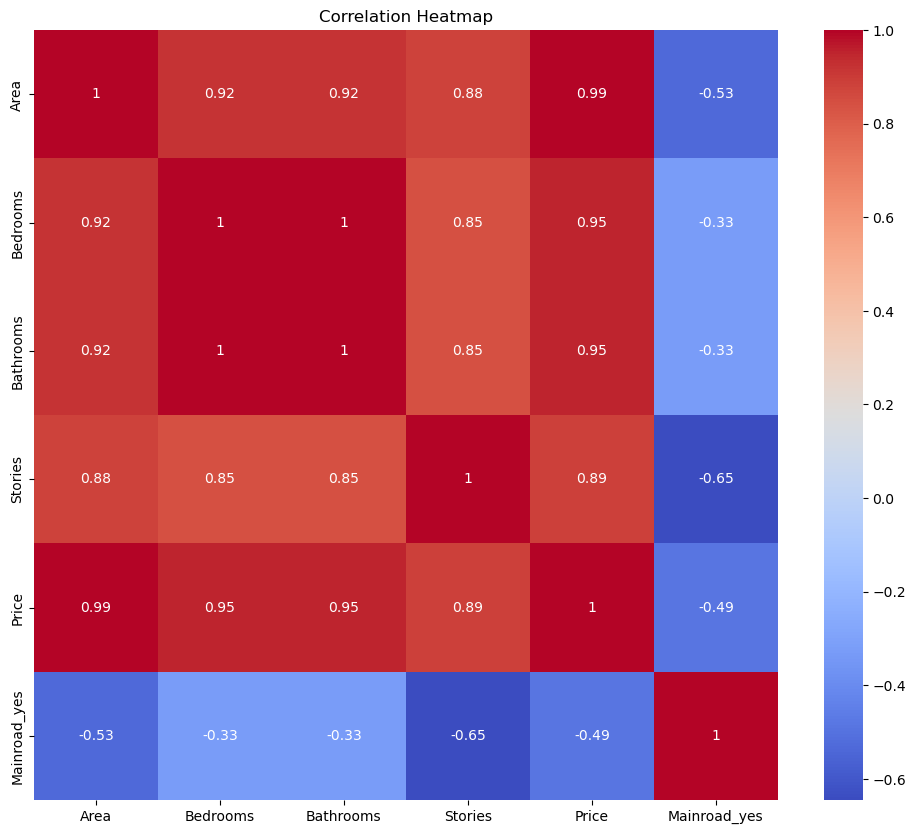

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
corr = df.corr()  # assuming your full dataframe is `df`
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


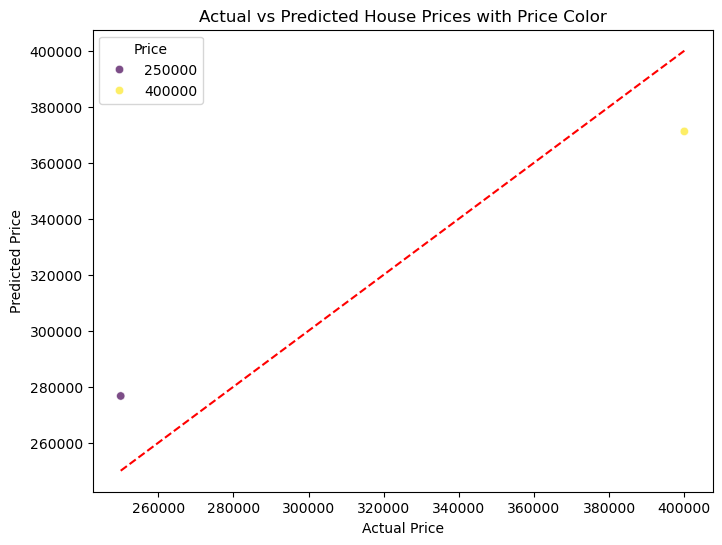

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_lr, hue=y_test, palette='viridis', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices with Price Color")
plt.show()


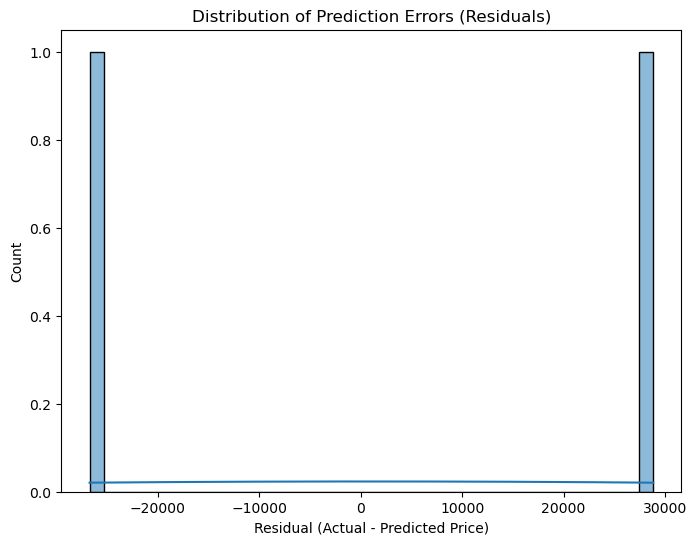

In [83]:
residuals = y_test - y_pred_lr

plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=40, kde=True)
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Residual (Actual - Predicted Price)")
plt.show()
